<h1>SALES ANALYSIS

## **SET UP, MERGE READ DATA**

In [1]:
import pandas as pd
import zipfile
import numpy as np
import shutil
from google.colab import drive

In [2]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
zip_path = '/content/gdrive/MyDrive/Data_ML_Study/Sales_Data.zip'

In [4]:
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
  zip_ref.extractall('Sales Data')

There are 12 csv files in the data folder, first we need to merge them 

In [5]:
import os, glob
data_path = '/content/Sales Data/Sales_Data'

In [6]:
# match csv files by patttern into a list
merge_files = glob.glob(os.path.join(data_path, 'Sales_*.csv'))
merge_files

['/content/Sales Data/Sales_Data/Sales_March_2019.csv',
 '/content/Sales Data/Sales_Data/Sales_December_2019.csv',
 '/content/Sales Data/Sales_Data/Sales_November_2019.csv',
 '/content/Sales Data/Sales_Data/Sales_September_2019.csv',
 '/content/Sales Data/Sales_Data/Sales_January_2019.csv',
 '/content/Sales Data/Sales_Data/Sales_June_2019.csv',
 '/content/Sales Data/Sales_Data/Sales_October_2019.csv',
 '/content/Sales Data/Sales_Data/Sales_May_2019.csv',
 '/content/Sales Data/Sales_Data/Sales_February_2019.csv',
 '/content/Sales Data/Sales_Data/Sales_August_2019.csv',
 '/content/Sales Data/Sales_Data/Sales_July_2019.csv',
 '/content/Sales Data/Sales_Data/Sales_April_2019.csv']

In [7]:
# combine all files and export as CSV
df_from_each_file = (pd.read_csv(files, sep = ',') for files in merge_files) # load df of each csv file
df_merged = pd.concat(df_from_each_file, ignore_index = True) # merge them
df_merged.to_csv('Merge_data.csv') # export as csv

In [8]:
merge_data_path = '/content/Merge_data.csv'

In [9]:
df = pd.read_csv(merge_data_path, index_col = 'Unnamed: 0')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,162009,iPhone,1,700,03/28/19 20:59,"942 Church St, Austin, TX 73301"
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301"
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301"
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016"
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016"


## **EXPLORE DATA**

In [10]:
def swap_columns(df, col1, col2):
    col_list = list(df.columns)
    x, y = col_list.index(col1), col_list.index(col2)
    col_list[y], col_list[x] = col_list[x], col_list[y]
    df = df[col_list]
    return df

In [11]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,162009,iPhone,1,700,03/28/19 20:59,"942 Church St, Austin, TX 73301"
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301"
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301"
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016"
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016"


##**CLEAN DATA: FIX BUG**

###DROP NAN

In [12]:
nan_df = df[df.isna().any(axis = 1)]
nan_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1047,NaN,NaN,NaN,NaN,NaN,NaN
1542,NaN,NaN,NaN,NaN,NaN,NaN
1653,NaN,NaN,NaN,NaN,NaN,NaN
2014,NaN,NaN,NaN,NaN,NaN,NaN
2043,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
185230,NaN,NaN,NaN,NaN,NaN,NaN
185379,NaN,NaN,NaN,NaN,NaN,NaN
185527,NaN,NaN,NaN,NaN,NaN,NaN
185913,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# we need to drop these 545 rows
df = df.dropna(how = 'all') # all mean drop if row contain all NaN, any mean drop if row got 1 nan values, since nan_df got all nan we use all

In [14]:
# check if df still got nan
df.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

###FIX: invalid literal for int() with base 10: 'Or' when converting month column values to int

In [15]:
# Since month column value is the 1st 2 number of order date col, we need to find the 'Or' in the date col
temp_df = df.loc[df['Order Date'].str[0:2] == 'Or']
temp_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
433,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
864,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
930,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1979,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2032,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


now we need to delete these row

In [16]:
# convert value to string: df[columns_name].str[start_index: end_index] can also use : to convert hold word
df = df.loc[df['Order Date'].str[0:2] != 'Or']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,162009,iPhone,1,700,03/28/19 20:59,"942 Church St, Austin, TX 73301"
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301"
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301"
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016"
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016"


##**Q1: What was the best month for sales?  How much were earned that month ?**

### STEP 1: add Month column

In [17]:
# Add Month column
df['Month'] = df['Order Date'].str[:2]
# check if month got null values
df.head()
df.Month.isnull().sum()

0

In [18]:
# convert month value to int
df['Month'] = df['Month'].astype('int32')

In [19]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,162009,iPhone,1,700,03/28/19 20:59,"942 Church St, Austin, TX 73301",3
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301",3
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301",3
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016",3
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016",3


### Step 2: add Sales column

In [20]:
# convert quantity and price dtype to float, int
df['Quantity Ordered'] = df['Quantity Ordered'].astype('int32')
df['Price Each'] = df['Price Each'].astype('float32')
# or
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])
df['Price Each'] = pd.to_numeric(df['Price Each'])

In [21]:
# add sale col by multiply quantity and price
df['Sales'] = df['Quantity Ordered'] * df['Price Each']

In [22]:
df = swap_columns(df, 'Sales', 'Order Date')

In [23]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Purchase Address,Month,Order Date
0,162009,iPhone,1,700.000000,700.000000,"942 Church St, Austin, TX 73301",3,03/28/19 20:59
1,162009,Lightning Charging Cable,1,14.950000,14.950000,"942 Church St, Austin, TX 73301",3,03/28/19 20:59
2,162009,Wired Headphones,2,11.990000,23.980000,"942 Church St, Austin, TX 73301",3,03/28/19 20:59
3,162010,Bose SoundSport Headphones,1,99.989998,99.989998,"261 10th St, San Francisco, CA 94016",3,03/17/19 05:39
4,162011,34in Ultrawide Monitor,1,379.989990,379.989990,"764 13th St, San Francisco, CA 94016",3,03/10/19 00:01


### Step 3: answer using group by

In [24]:
result = df.groupby('Month').sum()
result

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1811768.375,1.822257e+06
2,13449,2188884.750,2.202022e+06
3,17005,2791207.750,2.807100e+06
4,20558,3367671.000,3.390670e+06
5,18667,3135125.000,3.152607e+06
6,15253,2562025.500,2.577802e+06
7,16072,2632539.500,2.647776e+06
8,13448,2230345.500,2.244468e+06
9,13109,2084992.125,2.097560e+06


December is the highest sales month and January is the lowest month

###Step 4: Visualize

In [25]:
import matplotlib.pyplot as plt

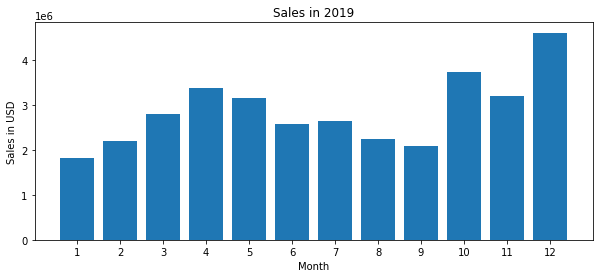

In [26]:
months = range(1,13)
plt.figure(figsize = (10, 4))
plt.title('Sales in 2019')
plt.bar(months, result['Sales'])
plt.xticks(months)
plt.xlabel('Month')
plt.ylabel('Sales in USD')
plt.show()

There are many holidays in December like Chrismas, Black Friday, New Year,etc so the sales is higher than the rest

##**QUESTION 2: WHICH CITY HAS THE HIGHEST SALES**

###STEP 1: add city column using pd.apply()

* We need to extract city and state from the address, the reason why we need state because there are city with the same name but located in different state

In [27]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Purchase Address,Month,Order Date
0,162009,iPhone,1,700.000000,700.000000,"942 Church St, Austin, TX 73301",3,03/28/19 20:59
1,162009,Lightning Charging Cable,1,14.950000,14.950000,"942 Church St, Austin, TX 73301",3,03/28/19 20:59
2,162009,Wired Headphones,2,11.990000,23.980000,"942 Church St, Austin, TX 73301",3,03/28/19 20:59
3,162010,Bose SoundSport Headphones,1,99.989998,99.989998,"261 10th St, San Francisco, CA 94016",3,03/17/19 05:39
4,162011,34in Ultrawide Monitor,1,379.989990,379.989990,"764 13th St, San Francisco, CA 94016",3,03/10/19 00:01


In [28]:
# split the address, take the city and state, we dont need the zip code( the last 5 number)
def get_city(address):
  city = address.split(',')[1]
  return city
def get_state(address):
  return address.split(',')[2].split(' ')[1] # becuase there is space before the state so we need to split(' ') and take the second item since the 1st item is space
df['City'] = df['Purchase Address'].apply(lambda x: f'{get_city(x)} ({get_state(x)})')
# or we can try
# df['City'] = df['Purchase Address'].apply(lambda x: x.split(',')[1] + ' ' + x.split(',')[2].split(' ')[1])

In [29]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Purchase Address,Month,Order Date,City
0,162009,iPhone,1,700.000000,700.000000,"942 Church St, Austin, TX 73301",3,03/28/19 20:59,Austin (TX)
1,162009,Lightning Charging Cable,1,14.950000,14.950000,"942 Church St, Austin, TX 73301",3,03/28/19 20:59,Austin (TX)
2,162009,Wired Headphones,2,11.990000,23.980000,"942 Church St, Austin, TX 73301",3,03/28/19 20:59,Austin (TX)
3,162010,Bose SoundSport Headphones,1,99.989998,99.989998,"261 10th St, San Francisco, CA 94016",3,03/17/19 05:39,San Francisco (CA)
4,162011,34in Ultrawide Monitor,1,379.989990,379.989990,"764 13th St, San Francisco, CA 94016",3,03/10/19 00:01,San Francisco (CA)


### STEP 2 : Answer using group by

In [30]:
result2 = df.groupby('City').sum()
result2

,Quantity Ordered,Price Each,Sales,Month
City,,,,
Atlanta (GA),16602,2779908.250,2.795499e+06,104794
Austin (TX),11153,1809873.625,1.819582e+06,69829
Boston (MA),22528,3637409.750,3.661642e+06,141112
Dallas (TX),16730,2752627.750,2.767975e+06,104620
Los Angeles (CA),33289,5421435.000,5.452571e+06,208325
New York City (NY),27932,4635371.000,4.664317e+06,175741
Portland (ME),2750,447189.250,4.497583e+05,17144
Portland (OR),11303,1860558.250,1.870732e+06,70621
San Francisco (CA),50239,8211461.500,8.262204e+06,315520


From the table, we can see the city sold most product is **San Francisco (CA)** and the lowest city is **Portland (ME)**

### STEP 3: Visualize

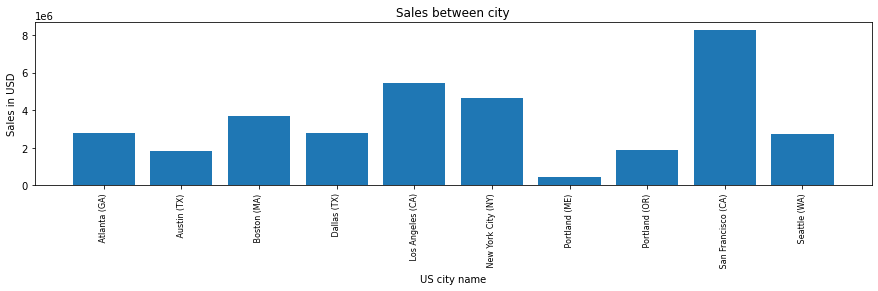

In [31]:
# Since the city order is not correct we need to sort them
cities = [city for city, df in df.groupby('City')]
plt.figure(figsize = (15, 3))
plt.title('Sales between city')
plt.bar(cities, result2['Sales'])
plt.xticks(cities, rotation = 'vertical', size = 8)
plt.xlabel('US city name')
plt.ylabel('Sales in USD')
plt.show()

But why San Francisco got the highest sales, one reason is that San Francisco got Silicon Valley, which will consume more electronic devices than other cities, hence it will make the sales higher

##**QUESTION 3: WHAT TIME SHOULD WE PLACE ADVERTISEMENT TO MAXIMUM THE LIKELIHOOD OF CUSTOMER BUYING PRODUCT**

In order to answer this question, we need to check the order date to know the time when customer order

In [32]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Purchase Address,Month,Order Date,City
0,162009,iPhone,1,700.000000,700.000000,"942 Church St, Austin, TX 73301",3,03/28/19 20:59,Austin (TX)
1,162009,Lightning Charging Cable,1,14.950000,14.950000,"942 Church St, Austin, TX 73301",3,03/28/19 20:59,Austin (TX)
2,162009,Wired Headphones,2,11.990000,23.980000,"942 Church St, Austin, TX 73301",3,03/28/19 20:59,Austin (TX)
3,162010,Bose SoundSport Headphones,1,99.989998,99.989998,"261 10th St, San Francisco, CA 94016",3,03/17/19 05:39,San Francisco (CA)
4,162011,34in Ultrawide Monitor,1,379.989990,379.989990,"764 13th St, San Francisco, CA 94016",3,03/10/19 00:01,San Francisco (CA)


### STEP 1: convert order date dtypes from O to datetime, add hour column

In [33]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [34]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Purchase Address,Month,Order Date,City
0,162009,iPhone,1,700.000000,700.000000,"942 Church St, Austin, TX 73301",3,2019-03-28 20:59:00,Austin (TX)
1,162009,Lightning Charging Cable,1,14.950000,14.950000,"942 Church St, Austin, TX 73301",3,2019-03-28 20:59:00,Austin (TX)
2,162009,Wired Headphones,2,11.990000,23.980000,"942 Church St, Austin, TX 73301",3,2019-03-28 20:59:00,Austin (TX)
3,162010,Bose SoundSport Headphones,1,99.989998,99.989998,"261 10th St, San Francisco, CA 94016",3,2019-03-17 05:39:00,San Francisco (CA)
4,162011,34in Ultrawide Monitor,1,379.989990,379.989990,"764 13th St, San Francisco, CA 94016",3,2019-03-10 00:01:00,San Francisco (CA)


In [35]:
# add hour and minute column
df['Hours'] = df['Order Date'].dt.hour
df['Minutes'] = df['Order Date'].dt.minute

In [36]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Purchase Address,Month,Order Date,City,Hours,Minutes
0,162009,iPhone,1,700.000000,700.000000,"942 Church St, Austin, TX 73301",3,2019-03-28 20:59:00,Austin (TX),20,59
1,162009,Lightning Charging Cable,1,14.950000,14.950000,"942 Church St, Austin, TX 73301",3,2019-03-28 20:59:00,Austin (TX),20,59
2,162009,Wired Headphones,2,11.990000,23.980000,"942 Church St, Austin, TX 73301",3,2019-03-28 20:59:00,Austin (TX),20,59
3,162010,Bose SoundSport Headphones,1,99.989998,99.989998,"261 10th St, San Francisco, CA 94016",3,2019-03-17 05:39:00,San Francisco (CA),5,39
4,162011,34in Ultrawide Monitor,1,379.989990,379.989990,"764 13th St, San Francisco, CA 94016",3,2019-03-10 00:01:00,San Francisco (CA),0,1


### STEP 2: answer using group by + visualize

In [37]:
number_order_per_hour = df.groupby(['Hours']).count()
number_order_per_hour

,Order ID,Product,Quantity Ordered,Price Each,Sales,Purchase Address,Month,Order Date,City,Minutes
Hours,,,,,,,,,,
0,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,831,831,831,831,831,831,831,831,831,831
4,854,854,854,854,854,854,854,854,854,854
5,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321
6,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482
7,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011
8,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256


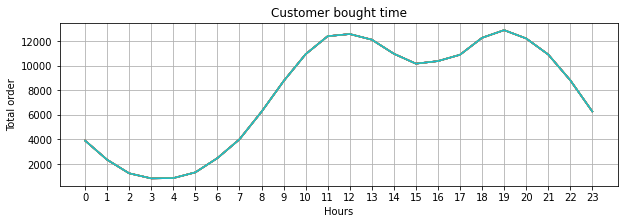

In [38]:
hours = [hour for hour, df in df.groupby('Hours')] # this line used to get all unique value and sort them
plt.figure(figsize=(10, 3))
plt.title('Customer bought time')
plt.xlabel('Hours')
plt.ylabel('Total order')
plt.xticks(hours)
plt.grid() # add the caro to the graph for easy visual
plt.plot(hours, number_order_per_hour)

So the peak time people make order is 11-12am and 19pm, so the good time to put ads is **10am or 18pm**

## **QUESTION 4: WHAT IS THE MOST SOLD PRODUCT ? WHY U THINK SO ?**

In [39]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Purchase Address,Month,Order Date,City,Hours,Minutes
0,162009,iPhone,1,700.000000,700.000000,"942 Church St, Austin, TX 73301",3,2019-03-28 20:59:00,Austin (TX),20,59
1,162009,Lightning Charging Cable,1,14.950000,14.950000,"942 Church St, Austin, TX 73301",3,2019-03-28 20:59:00,Austin (TX),20,59
2,162009,Wired Headphones,2,11.990000,23.980000,"942 Church St, Austin, TX 73301",3,2019-03-28 20:59:00,Austin (TX),20,59
3,162010,Bose SoundSport Headphones,1,99.989998,99.989998,"261 10th St, San Francisco, CA 94016",3,2019-03-17 05:39:00,San Francisco (CA),5,39
4,162011,34in Ultrawide Monitor,1,379.989990,379.989990,"764 13th St, San Francisco, CA 94016",3,2019-03-10 00:01:00,San Francisco (CA),0,1


In [40]:
product_group = df.groupby('Product')

In [41]:
product_group.sum()

,Quantity Ordered,Price Each,Sales,Month,Hours,Minutes
Product,,,,,,
20in Monitor,4129,4.510690e+05,4.541487e+05,29336,58764,122252
27in 4K Gaming Monitor,6244,2.429638e+06,2.435097e+06,44440,90916,184331
27in FHD Monitor,7550,1.125975e+06,1.132425e+06,52558,107540,219948
34in Ultrawide Monitor,6199,2.348718e+06,2.355558e+06,43304,89076,183480
AA Batteries (4-pack),27635,7.901568e+04,1.061184e+05,145558,298342,609039
AAA Batteries (4-pack),31017,6.171659e+04,9.274083e+04,146370,297332,612113
Apple Airpods Headphones,15661,2.332350e+06,2.349150e+06,109477,223304,455570
Bose SoundSport Headphones,13457,1.332367e+06,1.345565e+06,94113,192445,392603
Flatscreen TV,4819,1.440000e+06,1.445700e+06,34224,68815,142789


In [42]:
quantity_ordered = product_group.sum()['Quantity Ordered']

In [43]:
quantity_ordered

Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int32

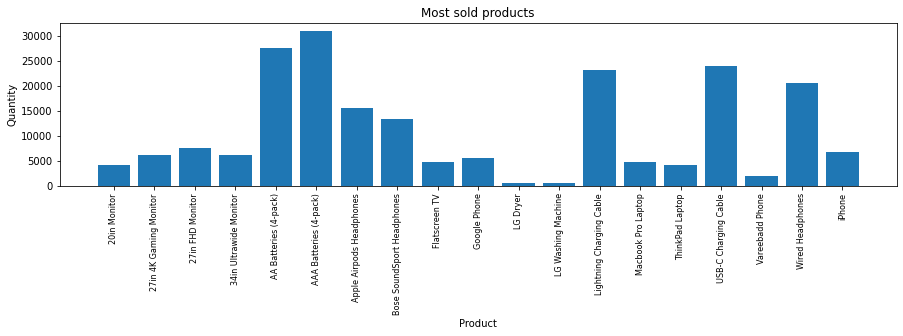

In [44]:
products = [product for product, df in product_group]
plt.figure(figsize = (15, 3))
plt.bar(products, quantity_ordered)
plt.title('Most sold products')
plt.xlabel('Product')
plt.ylabel('Quantity')
plt.xticks(products, rotation = 'vertical', size = 8)
plt.show()

Base on the graph the most sold product is **AAA Bateries (4 - pack)**, because all the product is electronic devices, batteries is essential, and they also cheap

Now we try to overlay this graph(another y axis on the right) with the product true price

In [45]:
prices = df.groupby('Product').mean()['Price Each']
prices

Product
20in Monitor                   109.989998
27in 4K Gaming Monitor         389.989990
27in FHD Monitor               149.990005
34in Ultrawide Monitor         379.989990
AA Batteries (4-pack)            3.840000
AAA Batteries (4-pack)           2.990000
Apple Airpods Headphones       150.000000
Bose SoundSport Headphones      99.989998
Flatscreen TV                  300.000000
Google Phone                   600.000000
LG Dryer                       600.000000
LG Washing Machine             600.000000
Lightning Charging Cable        14.950000
Macbook Pro Laptop            1700.000000
ThinkPad Laptop                999.989990
USB-C Charging Cable            11.950000
Vareebadd Phone                400.000000
Wired Headphones                11.990000
iPhone                         700.000000
Name: Price Each, dtype: float32

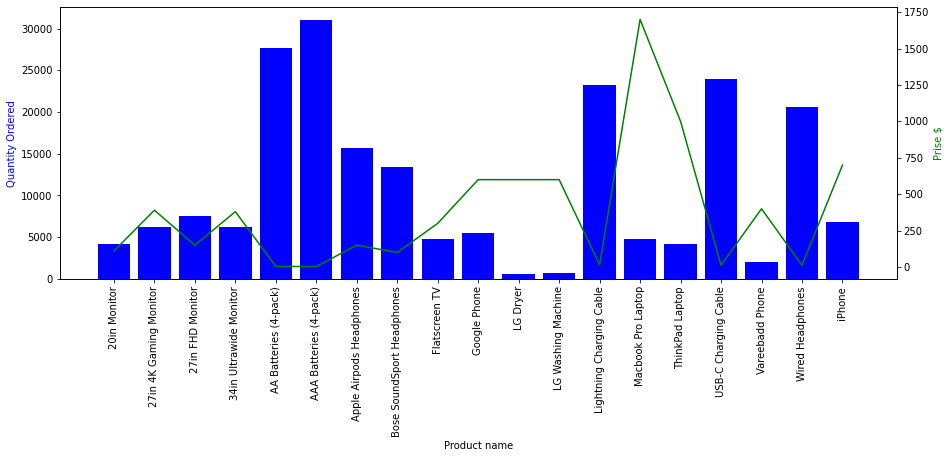

In [46]:
# plot another y axis / subplot
plt.rcParams["figure.figsize"] = (15, 5) # this code used to resize figure for overlay graph
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color = 'b')
ax2.plot(products, prices, 'g') # g is green
ax1.set_xlabel('Product name',)
ax1.set_ylabel('Quantity Ordered', color ='b')
ax2.set_ylabel('Prise $', color = 'g')
ax1.set_xticklabels(products, rotation = 'vertical', size = 10)
plt.show()

From this graph, we can come to conclusion is that the higher the price, the lower the sold quantity

##**QUESTION 5: WHAT PRODUCTS ARE OFTEN SOLD TOGETHER (HARD)** 

### STEP 1: SHRINK DATA INTO DUPLICATE VALUE ONLY

To check if products were bought together, we need to check the order ID(or address), if product got same order ID, that mean they are bought together

In [47]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Purchase Address,Month,Order Date,City,Hours,Minutes
0,162009,iPhone,1,700.000000,700.000000,"942 Church St, Austin, TX 73301",3,2019-03-28 20:59:00,Austin (TX),20,59
1,162009,Lightning Charging Cable,1,14.950000,14.950000,"942 Church St, Austin, TX 73301",3,2019-03-28 20:59:00,Austin (TX),20,59
2,162009,Wired Headphones,2,11.990000,23.980000,"942 Church St, Austin, TX 73301",3,2019-03-28 20:59:00,Austin (TX),20,59
3,162010,Bose SoundSport Headphones,1,99.989998,99.989998,"261 10th St, San Francisco, CA 94016",3,2019-03-17 05:39:00,San Francisco (CA),5,39
4,162011,34in Ultrawide Monitor,1,379.989990,379.989990,"764 13th St, San Francisco, CA 94016",3,2019-03-10 00:01:00,San Francisco (CA),0,1


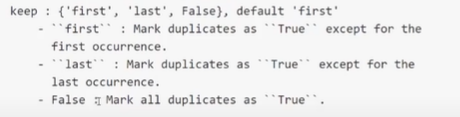

In [48]:
# duplicate will delete all rows with doesnt have dupliecate value 
df1 = df[df['Order ID'].duplicated(keep =False)] # first mean keep the first dup, 2nd mean 2 dup, false mean all dup

In [49]:
df1.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Purchase Address,Month,Order Date,City,Hours,Minutes
0,162009,iPhone,1,700.00,700.00,"942 Church St, Austin, TX 73301",3,2019-03-28 20:59:00,Austin (TX),20,59
1,162009,Lightning Charging Cable,1,14.95,14.95,"942 Church St, Austin, TX 73301",3,2019-03-28 20:59:00,Austin (TX),20,59
2,162009,Wired Headphones,2,11.99,23.98,"942 Church St, Austin, TX 73301",3,2019-03-28 20:59:00,Austin (TX),20,59
30,162037,iPhone,1,700.00,700.00,"277 Elm St, Los Angeles, CA 90001",3,2019-03-23 02:11:00,Los Angeles (CA),2,11
31,162037,Lightning Charging Cable,1,14.95,14.95,"277 Elm St, Los Angeles, CA 90001",3,2019-03-23 02:11:00,Los Angeles (CA),2,11


### STEP 2: Create Group col that store all product for each order ID

In [50]:
df1['Group item'] = df1.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [51]:
df1.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Purchase Address,Month,Order Date,City,Hours,Minutes,Group item
0,162009,iPhone,1,700.00,700.00,"942 Church St, Austin, TX 73301",3,2019-03-28 20:59:00,Austin (TX),20,59,"iPhone,Lightning Charging Cable,Wired Headphones"
1,162009,Lightning Charging Cable,1,14.95,14.95,"942 Church St, Austin, TX 73301",3,2019-03-28 20:59:00,Austin (TX),20,59,"iPhone,Lightning Charging Cable,Wired Headphones"
2,162009,Wired Headphones,2,11.99,23.98,"942 Church St, Austin, TX 73301",3,2019-03-28 20:59:00,Austin (TX),20,59,"iPhone,Lightning Charging Cable,Wired Headphones"
30,162037,iPhone,1,700.00,700.00,"277 Elm St, Los Angeles, CA 90001",3,2019-03-23 02:11:00,Los Angeles (CA),2,11,"iPhone,Lightning Charging Cable"
31,162037,Lightning Charging Cable,1,14.95,14.95,"277 Elm St, Los Angeles, CA 90001",3,2019-03-23 02:11:00,Los Angeles (CA),2,11,"iPhone,Lightning Charging Cable"


In [52]:
# now we need to drop the duplicate order id
df1 = df1[['Order ID', 'Group item']].drop_duplicates()

In [53]:
df1.head()

,Order ID,Group item
0,162009,"iPhone,Lightning Charging Cable,Wired Headphones"
30,162037,"iPhone,Lightning Charging Cable"
60,162066,"AA Batteries (4-pack),USB-C Charging Cable"
66,162071,"Vareebadd Phone,USB-C Charging Cable"
78,162082,"Vareebadd Phone,Wired Headphones"


### STEP 3: Now we need to iterate the group item and count product pairs and got the answer

In [54]:
from itertools import combinations
from collections import Counter

In [55]:
count = Counter()
for row in df1['Group item']:
  row_list = row.split(',')
  count.update(Counter(combinations(row_list, 2))) # 2 is ocurrances, which mean they will count only 2 item as 1, can alos try 3
for key, value in count.most_common(15):
  print(f'{key}: {value}')

('iPhone', 'Lightning Charging Cable'): 1005
('Google Phone', 'USB-C Charging Cable'): 987
('iPhone', 'Wired Headphones'): 447
('Google Phone', 'Wired Headphones'): 414
('Vareebadd Phone', 'USB-C Charging Cable'): 361
('iPhone', 'Apple Airpods Headphones'): 360
('Google Phone', 'Bose SoundSport Headphones'): 220
('USB-C Charging Cable', 'Wired Headphones'): 160
('Vareebadd Phone', 'Wired Headphones'): 143
('Lightning Charging Cable', 'Wired Headphones'): 92
('Lightning Charging Cable', 'Apple Airpods Headphones'): 81
('Vareebadd Phone', 'Bose SoundSport Headphones'): 80
('USB-C Charging Cable', 'Bose SoundSport Headphones'): 77
('Apple Airpods Headphones', 'Wired Headphones'): 69
('Lightning Charging Cable', 'USB-C Charging Cable'): 58


* If we use combination of 2 item the most sold product is iphone and lighting charge caple

In [56]:
# try combination with 3 products
count = Counter()
for row in df1['Group item']:
  row_list = row.split(',')
  count.update(Counter(combinations(row_list, 3))) 
for key, value in count.most_common(15):
  print(f'{key}: {value}')

('Google Phone', 'USB-C Charging Cable', 'Wired Headphones'): 87
('iPhone', 'Lightning Charging Cable', 'Wired Headphones'): 62
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones'): 47
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones'): 35
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones'): 33
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones'): 27
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones'): 24
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones'): 16
('Vareebadd Phone', 'Bose SoundSport Headphones', 'Wired Headphones'): 5
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones'): 5
('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones'): 4
('Google Phone', 'USB-C Charging Cable', 'AA Batteries (4-pack)'): 3
('iPhone', 'Lightning Charging Cable', 'Lightning Charging Cable'): 3
('iPhone', 'Lightning Charging Cable', 'AA Batteries (4-pack)'): 3
('iPhone'

The best combination is :Google Phone,USB-C Charging Cable, Wired Headphones